<a href="https://colab.research.google.com/github/kumarabhinavthakur274/Play_Store_-App_-Review_Analysis---Capstone-Project/blob/main/Kumar_Abhinav_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1284]:
#importing pandas and numpy module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1285]:
# importing module for ignoring warnings 
import warnings
warnings.filterwarnings("ignore")

In [1286]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1287]:
# importing data set on Play store app review Analysis
df = pd.read_csv("/content/drive/MyDrive/Project/playstore/Play Store Data.csv")


In [1288]:
df1 = pd.read_csv("/content/drive/MyDrive/Project/playstore/User Reviews.csv")

# **Basic Data Overview**

In [1289]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1290]:
df1.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [1291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1292]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [1293]:
df.describe()    # here we can see that one one column "Rating" is numaric other numeric attributes are in string.

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [1294]:
df1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [1295]:
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

# Data Cleaning

Lets treat the Rating column

In [1296]:
# we know that column rating is in interger form so lets chek for null values
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [1297]:
#1. Substituting the Null and values greater than 5 (wrong ratings)  in Rating with 0
df['Rating'] = df['Rating'].fillna(0)
df['Rating'] = df['Rating'].replace(19.,0,regex = True)

In [1298]:
# yeahhh Rating column is treated
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 0. , 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

Lets Tackle the Reviews column now

In [1299]:
# converting the string data to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'],errors ='coerce')
# substituting all the null values in data set with 0
df['Reviews'] = df['Reviews'].replace(np.nan,0,regex = True)
# changing the data type of Reviews 
df['Reviews'] = df['Reviews'].astype(int)

In [1300]:
df.info()   #now check the dtype of Reviews , task is done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


Lets Treat the price column

In [1301]:
df['Price'].unique() #we have to remove the dollor symbols and then convert it into float

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In the above cell we can see that there some wrong value named Everyone out of no where lets eliminate it

In [1302]:
# checking for Everyone(wrong data)
temp_df = df['Price'].value_counts().reset_index()
temp_df[temp_df["index"]=="Everyone"]

,index,Price
60,Everyone,1


In [1303]:
# eliminating dollor symbol
df['Price'] = df['Price'].str.replace('$','')
# Replacing Everyone with 0
df['Price'] = df['Price'].replace('Everyone',0,regex = True)
# Now converting the data type into float
df['Price'] = df['Price'].astype(float)

In [1304]:
df.info()  # we can see that task is done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


Lets treat Installs column

In [1305]:
df.Installs.unique() #checking for unique values in the column

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In the Installs column we can see the '+' (plus) symbol which we need to remove along with that we need to convert the string to float, there is a wrong data "Free" which we need to eliminate or replace.

In [1306]:
# replacing the plus symbol with nothing 
df.Installs = df.Installs.apply(lambda x:x.replace('+',''))
# replacing wrong data "Free" with "0" 
df['Installs'] = df['Installs'].replace('Free',"0",regex = True)
# replacing comma(,) with nothing
df['Installs'] = df['Installs'].replace(',','',regex = True)
# finally we will convert the data into float
df['Installs'] = df['Installs'].astype(float)

In [1307]:
df.head(5)   # lets check the data for the changes that we have implimented, yes we can see the changes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Let us treat the Size column now**

In [1308]:
df.Size.unique()    # checking for unique values in the column

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

To convert the string data in Size Column into numarical data we need to do the following task: 

* Remove M and K from the data
* convert it into commen unit (kb) in float  



In [1309]:
def Replace_M_k(x):
  ''' this function takes the row element (Size column) and 
      returns te replacement of 'M' with 000 and 'k' with nothing
      and 0 if there is other data than above.
  '''
  if "M" in x:
    return x.replace("M","000")
  elif "k" in x :
    return x.replace("k","")
  else:
    return 0

In [1310]:
df['Size'] = df['Size'].apply(Replace_M_k)  # applying the above function for each row

In [1311]:
df['Size'] = df['Size'].astype(float)  # converting the data type to float

In [1312]:
print(list(df.Size.unique()) ) #we can see that some values(less than 20 mb) remained unaltered by above operation so we need multiplying 1000

[19000.0, 14000.0, 8.7, 25000.0, 2.8, 5.6, 29000.0, 33000.0, 3.1, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0, 2.7, 5.5, 17000.0, 39000.0, 31000.0, 4.2, 7.0, 23000.0, 6.0, 6.1, 4.6, 9.2, 5.2, 11000.0, 24000.0, 0.0, 9.4, 15000.0, 10000.0, 1.2, 26000.0, 8.0, 7.9, 56000.0, 57000.0, 35000.0, 54000.0, 201.0, 3.6, 5.7, 8.6, 2.4, 27000.0, 2.5, 16000.0, 3.4, 8.9, 3.9, 2.9, 38000.0, 32000.0, 5.4, 18000.0, 1.1, 2.2, 4.5, 9.8, 52000.0, 9.0, 6.7, 30000.0, 2.6, 7.1, 3.7, 22000.0, 7.4, 6.4, 3.2, 8.2, 9.9, 4.9, 9.5, 5.0, 5.9, 13000.0, 73000.0, 6.8, 3.5, 4.0, 2.3, 7.2, 2.1, 42000.0, 7.3, 9.1, 55000.0, 23.0, 6.5, 1.5, 7.5, 51000.0, 41000.0, 48000.0, 8.5, 46000.0, 8.3, 4.3, 4.7, 3.3, 40000.0, 7.8, 8.8, 6.6, 5.1, 61000.0, 66000.0, 79.0, 8.4, 118.0, 44000.0, 695.0, 1.6, 6.2, 18.0, 53000.0, 1.4, 3.0, 5.8, 3.8, 9.6, 45000.0, 63000.0, 49000.0, 77000.0, 4.4, 4.8, 70000.0, 6.9, 9.3, 10.0, 8.1, 36000.0, 84000.0, 97000.0, 2.0, 1.9, 1.8, 5.3, 47000.0, 556.0, 526.0, 76000.0, 7.6, 59000.0, 9.7, 78000.0, 72000.0, 43

In [1313]:
# multiplying the unaltered values with 1000 and passing the whole column element into list
size_list = []
for i in df.Size:
  if i< 20.0:
    size_list.append(i*1000)
  else:
    size_list.append(i)


In [1314]:
df["Size"] = pd.DataFrame(size_list) #replacing the whole column with new set of threated values

In [1315]:
print(list(df['Size'].unique())) #checking for unique values once again , yes task is done

[19000.0, 14000.0, 8700.0, 25000.0, 2800.0, 5600.0, 29000.0, 33000.0, 3100.0, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0, 2700.0, 5500.0, 17000.0, 39000.0, 31000.0, 4200.0, 7000.0, 23000.0, 6000.0, 6100.0, 4600.0, 9200.0, 5200.0, 11000.0, 24000.0, 0.0, 9400.0, 15000.0, 10000.0, 1200.0, 26000.0, 8000.0, 7900.0, 56000.0, 57000.0, 35000.0, 54000.0, 201.0, 3600.0, 5700.0, 8600.0, 2400.0, 27000.0, 2500.0, 16000.0, 3400.0, 8900.0, 3900.0, 2900.0, 38000.0, 32000.0, 5400.0, 18000.0, 1100.0, 2200.0, 4500.0, 9800.0, 52000.0, 9000.0, 6700.0, 30000.0, 2600.0, 7100.0, 3700.0, 22000.0, 7400.0, 6400.0, 3200.0, 8200.0, 9900.0, 4900.0, 9500.0, 5000.0, 5900.0, 13000.0, 73000.0, 6800.0, 3500.0, 4000.0, 2300.0, 7200.0, 2100.0, 42000.0, 7300.0, 9100.0, 55000.0, 23.0, 6500.0, 1500.0, 7500.0, 51000.0, 41000.0, 48000.0, 8500.0, 46000.0, 8300.0, 4300.0, 4700.0, 3300.0, 40000.0, 7800.0, 8800.0, 6600.0, 5100.0, 61000.0, 66000.0, 79.0, 8400.0, 118.0, 44000.0, 695.0, 1600.0, 6200.0, 53000.0, 1400.0, 3000.0, 5800.

In [1316]:
df.info()  #check if above tasks has been reflectd or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [1317]:
df.isnull().sum().sort_values(ascending=False)  #lets check once how many null values are still left across the columns

Current Ver       8
Android Ver       3
Type              1
Content Rating    1
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Genres            0
Last Updated      0
dtype: int64

Treating "Content Rating" column 

In [1318]:
df[df['Content Rating'].isnull()] #checking for the index of null values 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,0.0,0,0.0,0.0,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [1319]:
df= df.drop(10472) #dropping the column with null values

## Treating "type" column

In [1320]:
# We will do the task same as above in this coluumn as well

In [1321]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [1322]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,0.0,0,0.0,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [1323]:
df= df.drop(9148)

In [1324]:
df.isnull().sum().sort_values(ascending=False)  #lets check once how many null values are still left across the columns

Current Ver       8
Android Ver       2
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

Treating column "Android ver" column

In [1325]:
df[df['Android Ver'].isnull()] #checking for null values


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,1000.0,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,10000.0,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [1326]:
# finding the highest occuring data in the column
temp_df = df.groupby('Android Ver').App.count().sort_values(ascending = False).reset_index() 
temp_df

,Android Ver,App
0,4.1 and up,2451
1,4.0.3 and up,1501
2,4.0 and up,1375
3,Varies with device,1361
4,4.4 and up,980
5,2.3 and up,652
6,5.0 and up,601
7,4.2 and up,394
8,2.3.3 and up,281
9,2.2 and up,244


In [1327]:
# Replacing the null values with highest occuring android version
df['Android Ver'] = df['Android Ver'].replace(np.nan,"4.1 and up")  

Treating current ver column

we will do the same task for this column as above

In [1329]:
df[df['Current Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,5000.0,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,1000000.0,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,500000.0,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,0.0,0,222.0,100.0,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,50000.0,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,0.0,44,7200.0,10000.0,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,0.0,1,237.0,10.0,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,0.0,8,658.0,1000.0,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [1330]:
temp_df1 = df.groupby('Current Ver').App.count().sort_values(ascending = False).reset_index()
temp_df1

,Current Ver,App
0,Varies with device,1458
1,1.0,809
2,1.1,264
3,1.2,178
4,2.0,151
...,...,...
2826,2.1.6579,1
2827,2.1.54,1
2828,2.1.3181,1
2829,2.1.3.2,1


In [1331]:
df['Current Ver'] = df['Current Ver'].replace(np.nan,"Varies with device")

In [1332]:
df.isnull().sum().sort_values(ascending=False)  # finally there is no null values 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Data Cleaning in 2nd Data Frame** 

In [1333]:
df1.isnull().sum().sort_values(ascending=False) # checking for the null values


Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
App                           0
dtype: int64

In [1334]:
df1 = df1.dropna() # dropping all the null vaues from entire data frame

In [1335]:
df1.isnull().sum().sort_values(ascending=False)

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [1336]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


# **Data Analysis and Visualization**

In [1337]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1338]:
df1.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [1339]:
# category vs counts , it will give the no. of apps in each catarory

In [1340]:
df_category_vs_count = df.groupby('Category').App.count().reset_index()
df_category_vs_count.rename(columns = {'Category':'App Catagory', 'App':'No. of Apps'}, inplace = True)

In [1341]:
df_category_vs_count

,App Catagory,No. of Apps
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


Text(0, 0.5, 'No. of Apps')

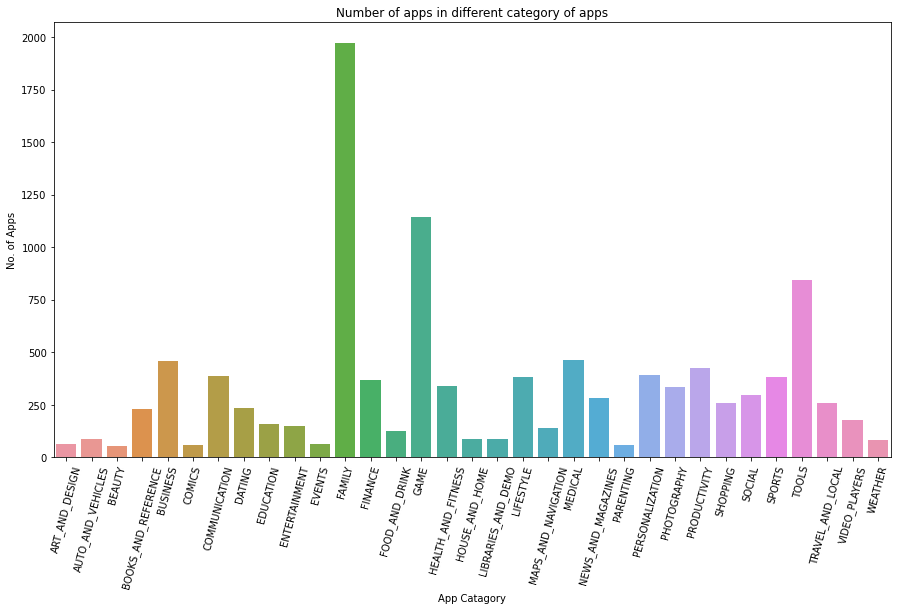

In [1342]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_category_vs_count, x='App Catagory', y='No. of Apps')
plt.xticks(rotation=75)
plt.title('Number of apps in different category of apps')
plt.xlabel('App Catagory')
plt.ylabel('No. of Apps')

In [1343]:
# category vs installs , it will give most popular catagory
df_category_vs_installs = df.groupby('Category')["Installs"].mean().reset_index()
df_category_vs_installs.rename(columns = {'Category':'App Catagory', 'Installs':'Avg_installs'}, inplace = True)

df_category_vs_installs 

,App Catagory,Avg_installs
0,ART_AND_DESIGN,1.912894e+06
1,AUTO_AND_VEHICLES,6.250613e+05
2,BEAUTY,5.131519e+05
3,BOOKS_AND_REFERENCE,8.318050e+06
4,BUSINESS,2.178076e+06
5,COMICS,9.347692e+05
6,COMMUNICATION,8.435989e+07
7,DATING,1.129533e+06
8,EDUCATION,5.586231e+06
9,ENTERTAINMENT,1.925611e+07


Text(0, 0.5, 'Avg_installs')

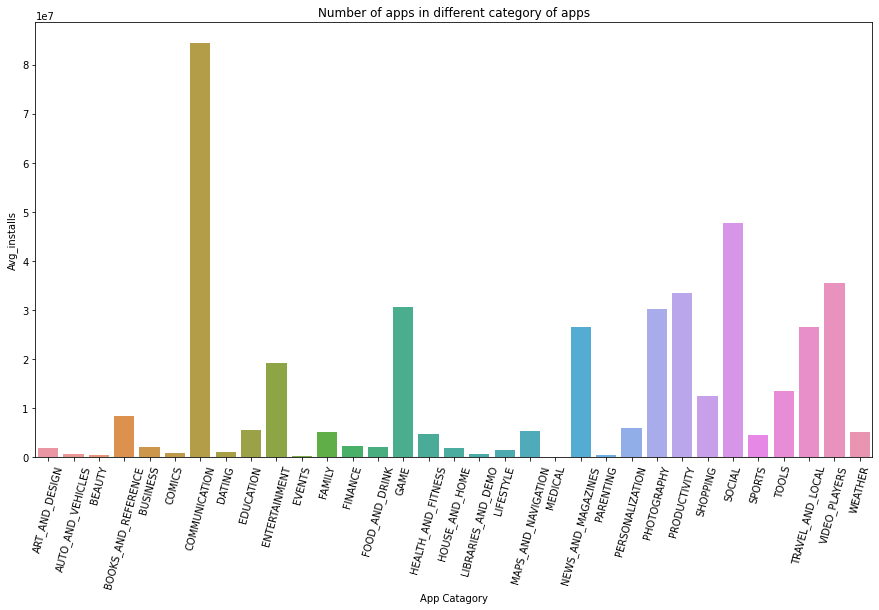

In [1344]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_category_vs_installs, x= 'App Catagory', y= 'Avg_installs')
plt.xticks(rotation=75)
plt.title('Number of apps in different category of apps')
plt.xlabel('App Catagory')
plt.ylabel('Avg_installs')

In [1345]:
df_installs_vs_counts = pd.merge(df_category_vs_count, df_category_vs_installs, on='App Catagory')
df_installs_vs_counts

,App Catagory,No. of Apps,Avg_installs
0,ART_AND_DESIGN,65,1.912894e+06
1,AUTO_AND_VEHICLES,85,6.250613e+05
2,BEAUTY,53,5.131519e+05
3,BOOKS_AND_REFERENCE,231,8.318050e+06
4,BUSINESS,460,2.178076e+06
5,COMICS,60,9.347692e+05
6,COMMUNICATION,387,8.435989e+07
7,DATING,234,1.129533e+06
8,EDUCATION,156,5.586231e+06
9,ENTERTAINMENT,149,1.925611e+07


Text(0.5, 0, 'app_category')

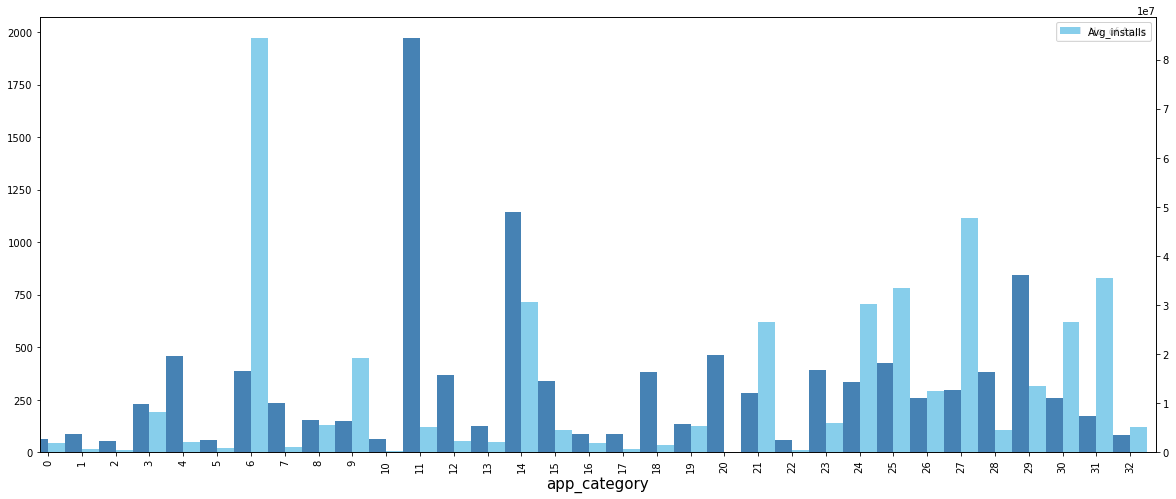

In [1346]:
fig = plt.figure(figsize =(20,8))
plt.xlabel('Category of Apps')# Create matplotlib figure 
ax = fig.add_subplot(111)
ax.set_xlabel('app_category') # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.5

df_category_vs_count.plot(kind='bar', color='steelblue', ax=ax, width=width, position=1)
df_category_vs_installs.plot(kind='bar', color='skyblue', ax=ax2, width=width, position=0)
ax.set_xlabel('app_category',fontsize = 15)

In [1347]:
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [1348]:
relevent_df = df1.groupby(['App','Sentiment'])['Translated_Review'].count().unstack()
relevent_df

Sentiment,Negative,Neutral,Positive
App,,,
10 Best Foods for You,10.0,22.0,162.0
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
11st,7.0,9.0,23.0
1800 Contacts - Lens Store,6.0,10.0,64.0
1LINE – One Line with One Touch,8.0,3.0,27.0
...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,21.0,8.0,39.0
Hotspot Shield Free VPN Proxy & Wi-Fi Security,3.0,14.0,17.0
Hotstar,14.0,4.0,14.0
